# Decision Tree Model

In [701]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [702]:
df.head()

,date,UBS_x,UBS Financial Services Inc.,UBS Investment Bank,UBS Global Wealth Management,UBS Asset Management,Open,High,Low,Close,...,Dow_EMA_Move,Dow_EMA_Move_5,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_1,target_2,target_3,target_4,target_5
0,2019-01-04,14.791667,0.0,0.0,0.0,0.0,10.734068,10.937397,10.687472,10.878093,...,1,1,1,1,0,0,1,1,1,1
1,2019-01-07,12.208333,0.0,0.0,0.0,0.0,10.878092,11.056005,10.823024,10.988229,...,1,1,1,0,0,1,1,1,1,0
2,2019-01-08,2.333333,0.0,0.0,0.0,0.0,11.047532,11.089893,10.945868,11.013644,...,1,1,0,1,0,1,1,0,0,1
3,2019-01-09,9.083333,0.0,0.0,0.0,0.0,11.081421,11.132253,10.954340,10.979756,...,1,1,0,1,0,1,0,1,1,0
4,2019-01-10,6.416667,0.0,0.0,0.0,0.0,11.030590,11.157670,11.022117,11.098366,...,1,1,1,0,0,0,1,1,1,0


# Target_1

In [703]:
# Basic Varaibles,  
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_1"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_1
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,0
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,1
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,1
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,0


In [704]:
pd.DataFrame(df.isna().sum()).T

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_1
0,0,0,1,0,26,18,20,15,0,0,0,0,18,0,15,0,15,0


### Cleaning NaN issue

In [705]:
#df = df.fillna(df.mean())
df = df.dropna()

# Train/test split

In [706]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [707]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [708]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [709]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_1
0    277
1    338
Name: target_1, dtype: int64


# Feature scaling

In [710]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [711]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [712]:
corr_matrix

,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14
Change_Close,1.000000,-0.014444,-0.014696,-0.006683,-0.006326,-0.063860,0.002136,0.020491,0.010018,-0.058657,-0.025389,0.043737,-0.075010,0.028108,0.031878
Wiki_Move,-0.014444,1.000000,0.140797,0.579468,-0.111789,-0.010005,0.217457,0.210151,0.162865,0.029675,0.534775,-0.011508,-0.011904,0.261773,0.023131
Wiki_EMA_5,-0.014696,0.140797,1.000000,0.315499,-0.170950,0.319133,0.083454,0.022875,0.040651,0.019091,0.283341,-0.060790,0.309807,0.036733,-0.001370
Wiki_Disparity_s_5,-0.006683,0.579468,0.315499,1.000000,-0.213146,-0.014225,0.234743,0.174276,0.153858,0.042830,0.855665,-0.054870,-0.034315,0.268792,-0.015043
Change_Google,-0.006326,-0.111789,-0.170950,-0.213146,1.000000,-0.327700,-0.280223,-0.115825,-0.142274,-0.057687,-0.197889,0.047683,-0.277977,-0.189456,-0.000335
Google_MAvg_s_5,-0.063860,-0.010005,0.319133,-0.014225,-0.327700,1.000000,0.078417,-0.060345,-0.055558,0.033958,-0.013170,0.011650,0.955751,-0.080012,-0.116627
Google_EMA_Move_5,0.002136,0.217457,0.083454,0.234743,-0.280223,0.078417,1.000000,0.269075,0.309540,0.034595,0.191173,-0.054183,0.039325,0.466151,-0.004643
Google_Disparity_s_Move,0.020491,0.210151,0.022875,0.174276,-0.115825,-0.060345,0.269075,1.000000,0.452386,-0.091032,0.193769,-0.063409,-0.029053,0.745787,0.018800
Google_ROC_Move,0.010018,0.162865,0.040651,0.153858,-0.142274,-0.055558,0.309540,0.452386,1.000000,-0.059360,0.178847,-0.008178,-0.066768,0.508449,0.014666
Google_RSI_Move,-0.058657,0.029675,0.019091,0.042830,-0.057687,0.033958,0.034595,-0.091032,-0.059360,1.000000,0.008883,-0.008084,0.040056,-0.094050,0.010628


In [713]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

In [714]:
feature_target_corr

Stock_RSI_Move             0.207333
Change_Close               0.041551
Change_Google              0.025266
Stoch_Oscillator_14        0.007676
Google_MAvg_s_5            0.004054
Google_MAvg_s_6            0.000671
Google_ROC_Move           -0.003819
Google_Disparity_s_Move   -0.003868
Wiki_Disparity_s_5        -0.017232
Wiki_EMA_5                -0.023801
Google_EMA_Move_5         -0.045208
Wiki_Disparity_s          -0.049202
Google_Move               -0.055587
Wiki_Move                 -0.074762
Google_RSI_Move           -0.100931
dtype: float64

# Select features based on correlation

In [715]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Disparity_s_5
Removed from list of features: Wiki_Disparity_s
Removed from list of features: Google_MAvg_s_6
Removed from list of features: Google_Disparity_s_Move
Removed from list of features: Google_ROC_Move


In [716]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [717]:
X_train_tr.head()

,Change_Close,Wiki_Move,Wiki_EMA_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_RSI_Move,Stock_RSI_Move,Google_Move,Stoch_Oscillator_14
0,0.561109,0.0,0.191928,0.481884,0.221315,0.0,1.0,1.0,1.0,0.444496
1,0.645234,1.0,0.263491,0.386219,0.245219,0.0,0.0,1.0,1.0,0.361944
2,0.480808,0.0,0.223399,0.452368,0.270916,0.0,1.0,0.0,0.0,0.305941
3,0.538166,1.0,0.200659,0.419294,0.275747,1.0,0.0,0.0,1.0,0.273290
4,0.557286,0.0,0.139284,0.465347,0.271474,0.0,0.0,1.0,0.0,0.256905


In [718]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

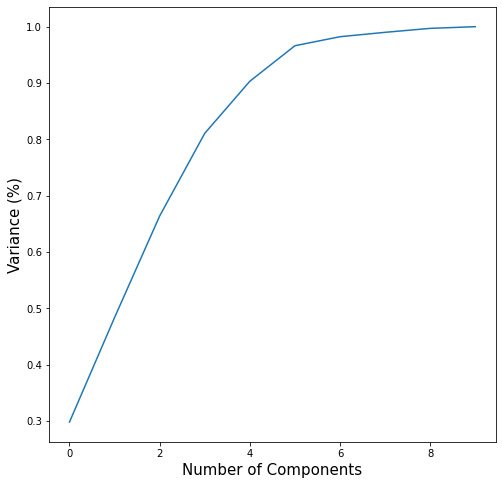

In [719]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [720]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [721]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [722]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [723]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.046154  0.300000  0.080000   10.000000
be long        0.921348  0.569444  0.703863  144.000000
accuracy       0.551948  0.551948  0.551948    0.551948
macro avg      0.483751  0.434722  0.391931  154.000000
weighted avg   0.864518  0.551948  0.663352  154.000000



### Tree diagram

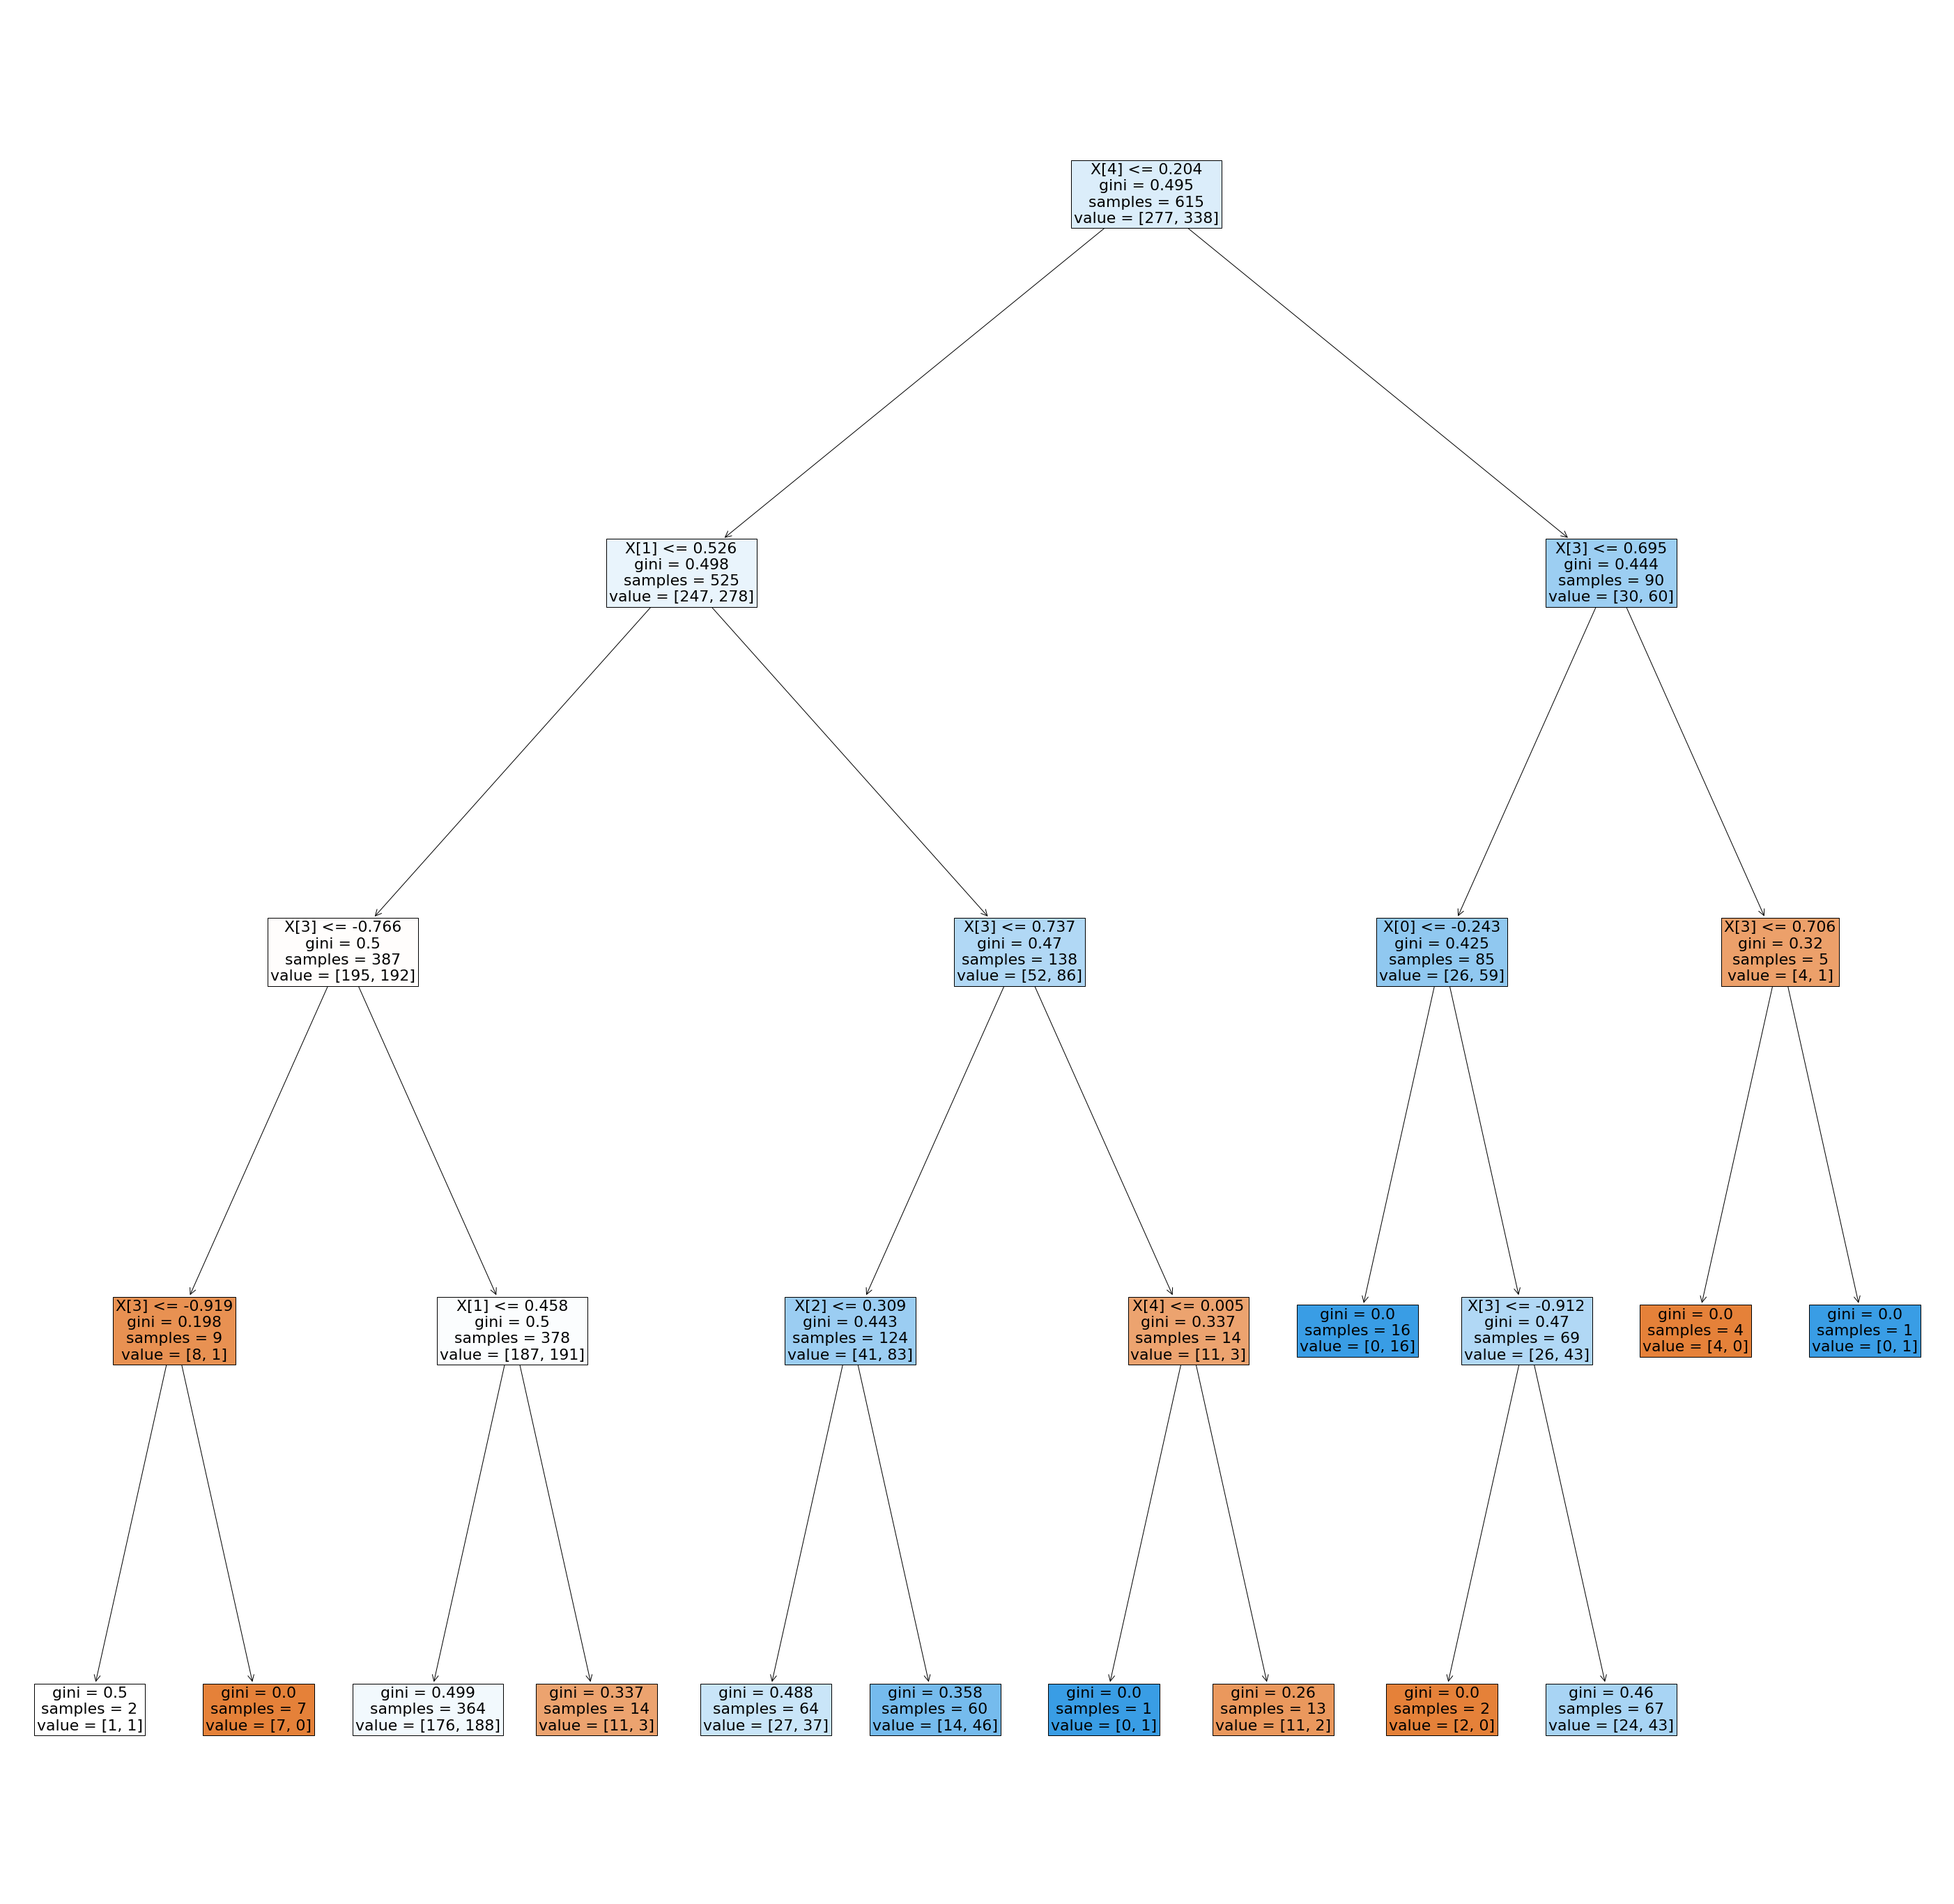

In [724]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [725]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [726]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      59.837398  55.194805
Precision     57.940663  56.944444
Recall        98.224852  92.134831
F1 Score      72.886937  70.386266


# Target_2

In [727]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [728]:
# Basic Varaibles --> all the columns are the same, except for target_3
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_2"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_2
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,1
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,1
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,0
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,1


In [729]:
pd.DataFrame(df.isna().sum()).T

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_2
0,0,0,1,0,26,18,20,15,0,0,0,0,18,0,15,0,15,0


### Cleaning NaN issue

In [730]:
#df = df.fillna(df.mean())
df = df.dropna()

# Train/test split

In [731]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [732]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [733]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [734]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_2
0    283
1    332
Name: target_2, dtype: int64


# Feature scaling

In [735]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [736]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [737]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [738]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Disparity_s_5
Removed from list of features: Wiki_Move
Removed from list of features: Google_MAvg_s_6
Removed from list of features: Google_Move
Removed from list of features: Google_ROC_Move


In [739]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [740]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

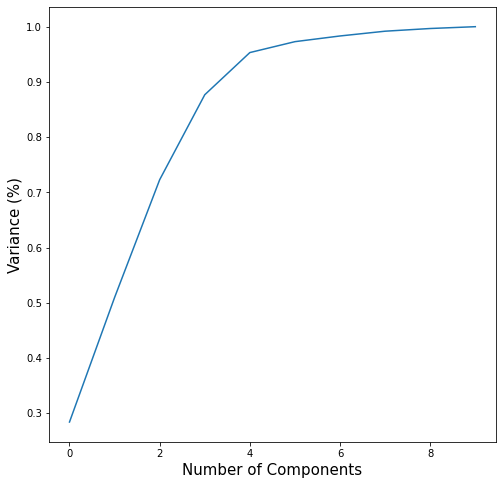

In [741]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [742]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [743]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [744]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [745]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.588235  0.500000  0.540541   80.000000
be long        0.534884  0.621622  0.575000   74.000000
accuracy       0.558442  0.558442  0.558442    0.558442
macro avg      0.561560  0.560811  0.557770  154.000000
weighted avg   0.562599  0.558442  0.557099  154.000000



### Tree diagram

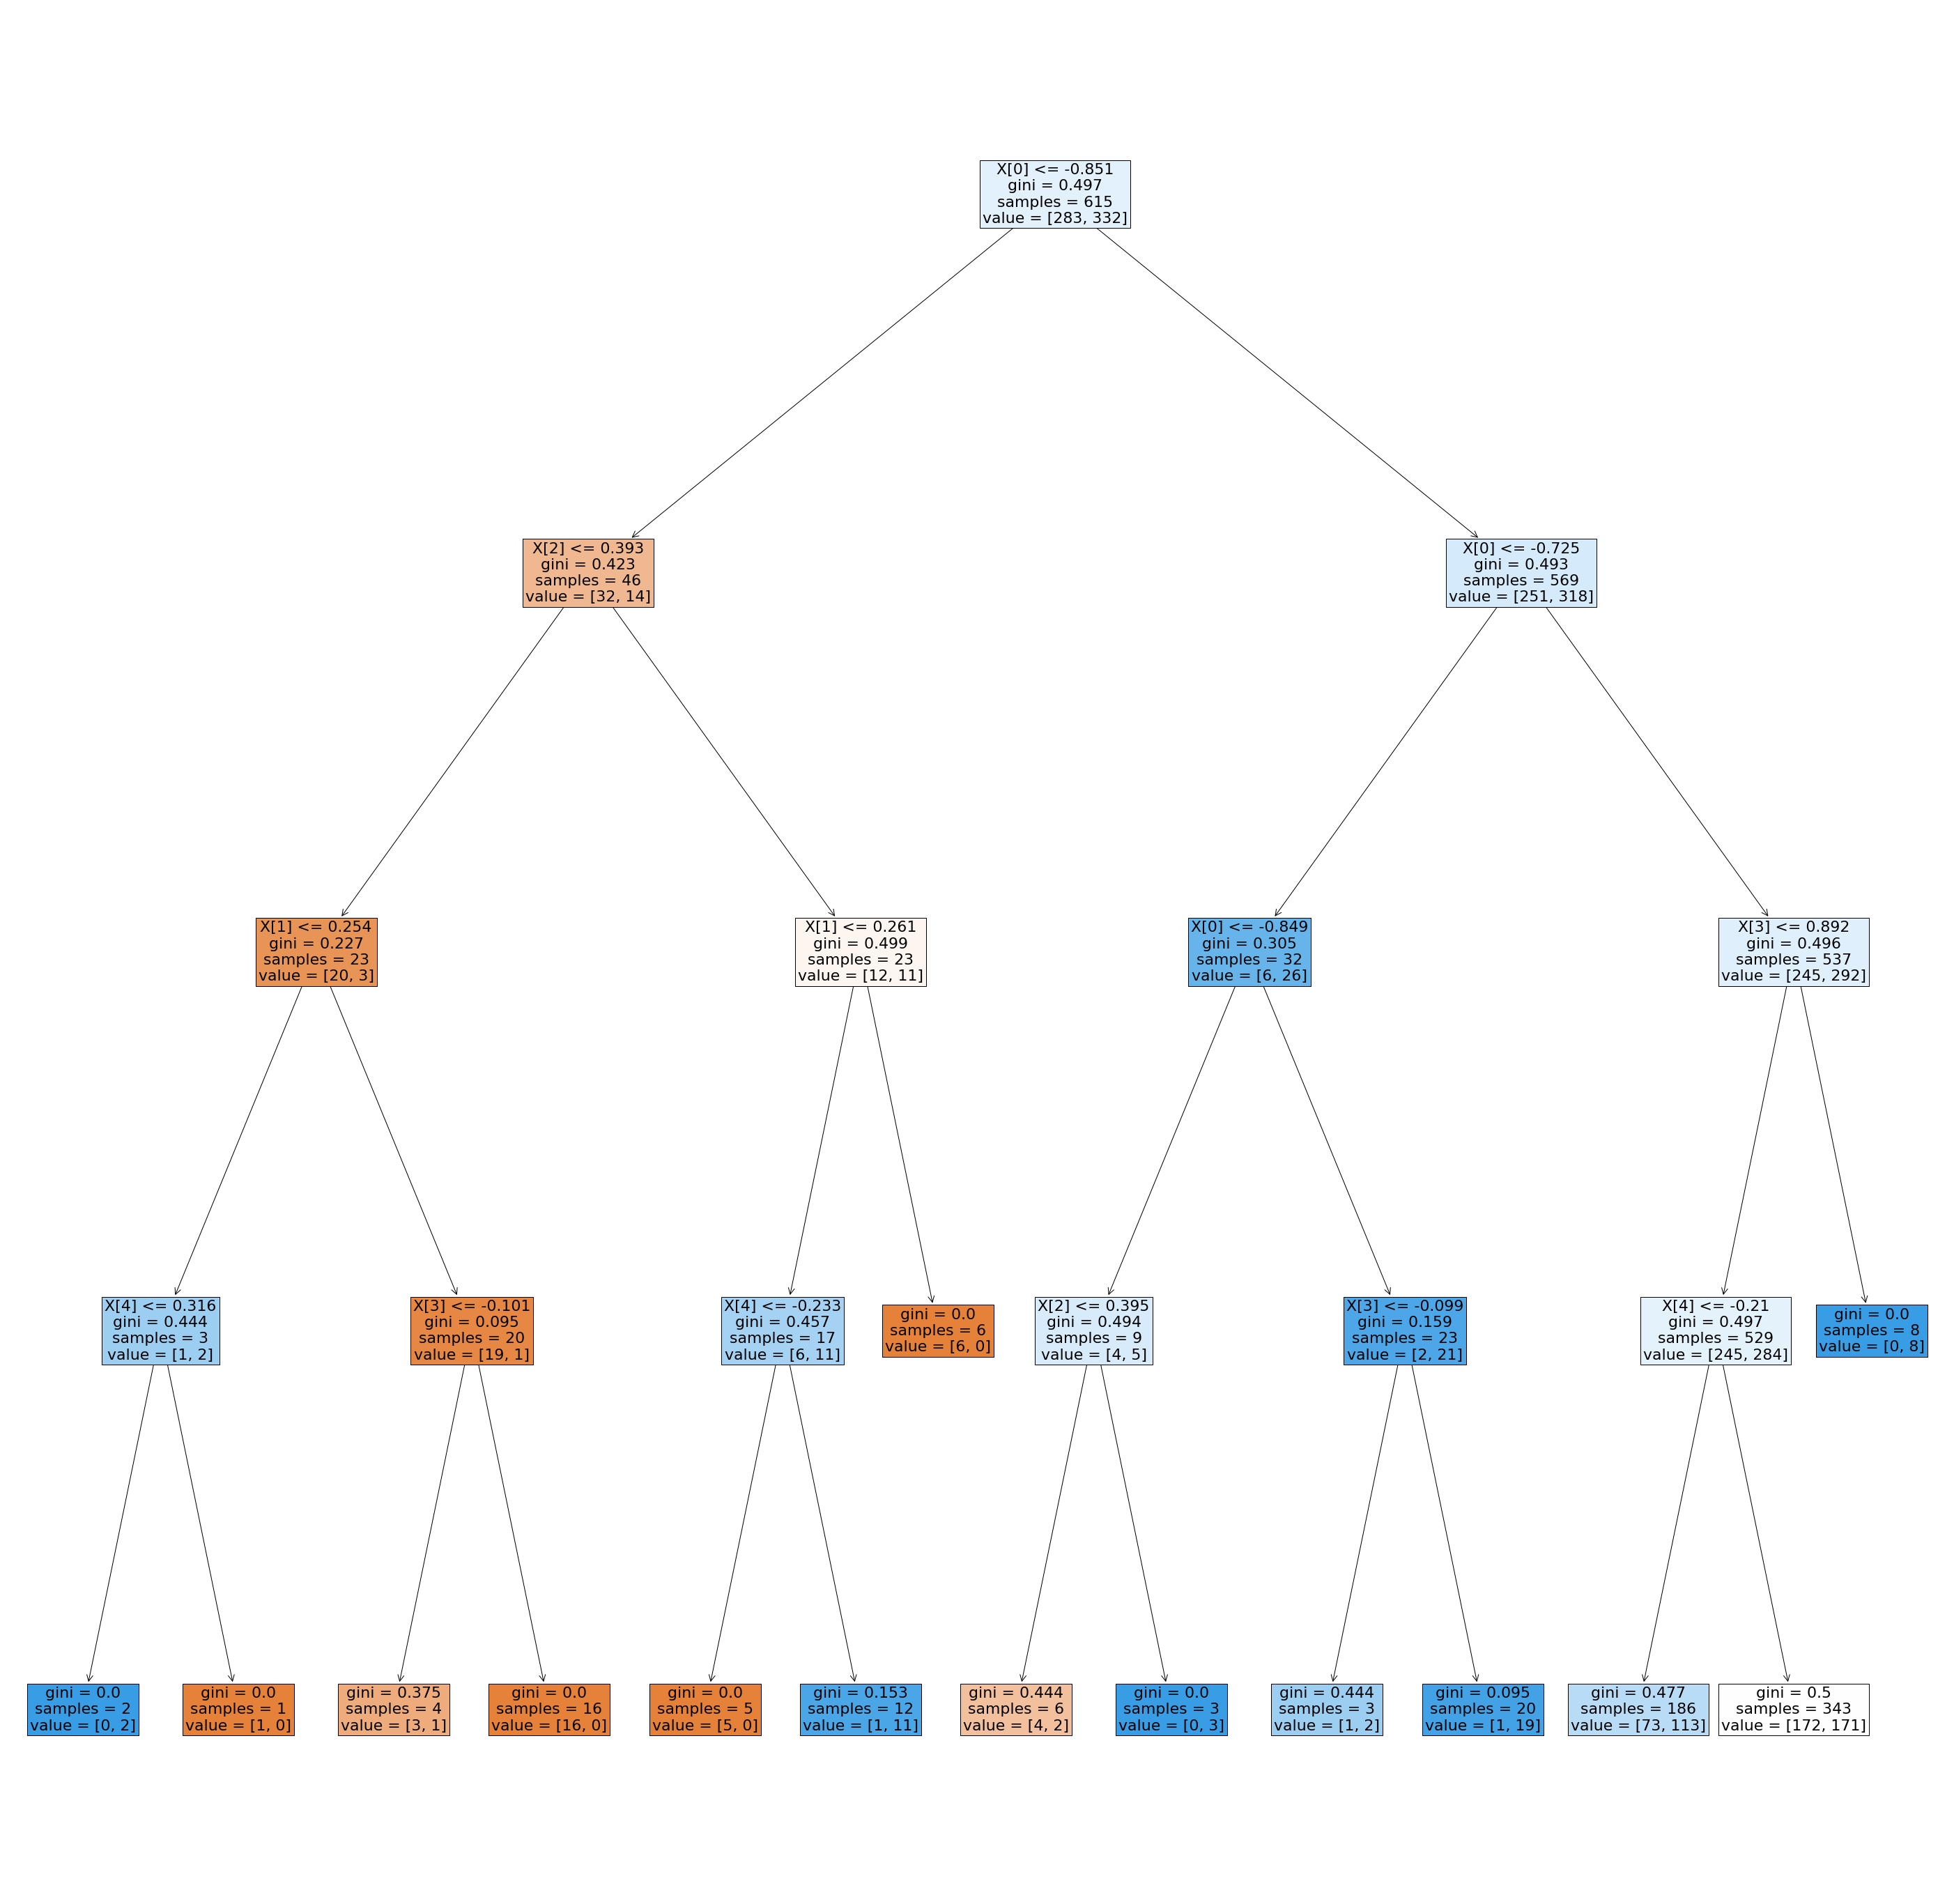

In [746]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [747]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [748]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      59.349593  55.844156
Precision     67.521368  62.162162
Recall        47.590361  53.488372
F1 Score      55.830389  57.500000


# Target_3

In [749]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [750]:
# Basic Varaibles --> all the columns are the same, except for target_3
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_3"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_3
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,1
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,0
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,1
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,1


In [751]:
pd.DataFrame(df.isna().sum()).T

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_3
0,0,0,1,0,26,18,20,15,0,0,0,0,18,0,15,0,15,0


### Cleaning NaN issue

In [752]:
#df = df.fillna(df.mean())
df = df.dropna()

# Train/test split

In [753]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [754]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [755]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [756]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_3
0    305
1    310
Name: target_3, dtype: int64


# Feature scaling

In [757]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [758]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [759]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [760]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Disparity_s_5
Removed from list of features: Wiki_Move
Removed from list of features: Google_MAvg_s_5
Removed from list of features: Google_Disparity_s_Move
Removed from list of features: Google_ROC_Move


In [761]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [762]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

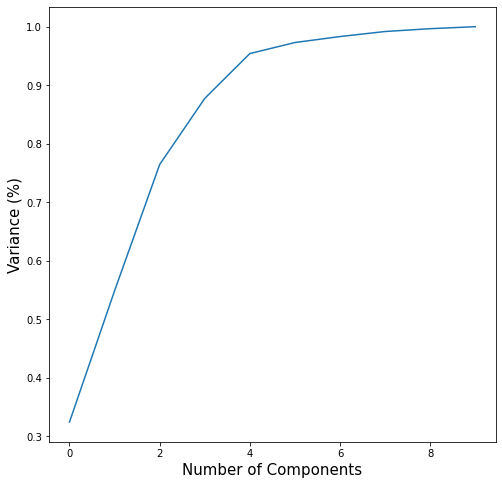

In [763]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [764]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [765]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [766]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [767]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.569444  0.493976  0.529032   83.000000
be long        0.487805  0.563380  0.522876   71.000000
accuracy       0.525974  0.525974  0.525974    0.525974
macro avg      0.528625  0.528678  0.525954  154.000000
weighted avg   0.531805  0.525974  0.526194  154.000000



### Tree diagram

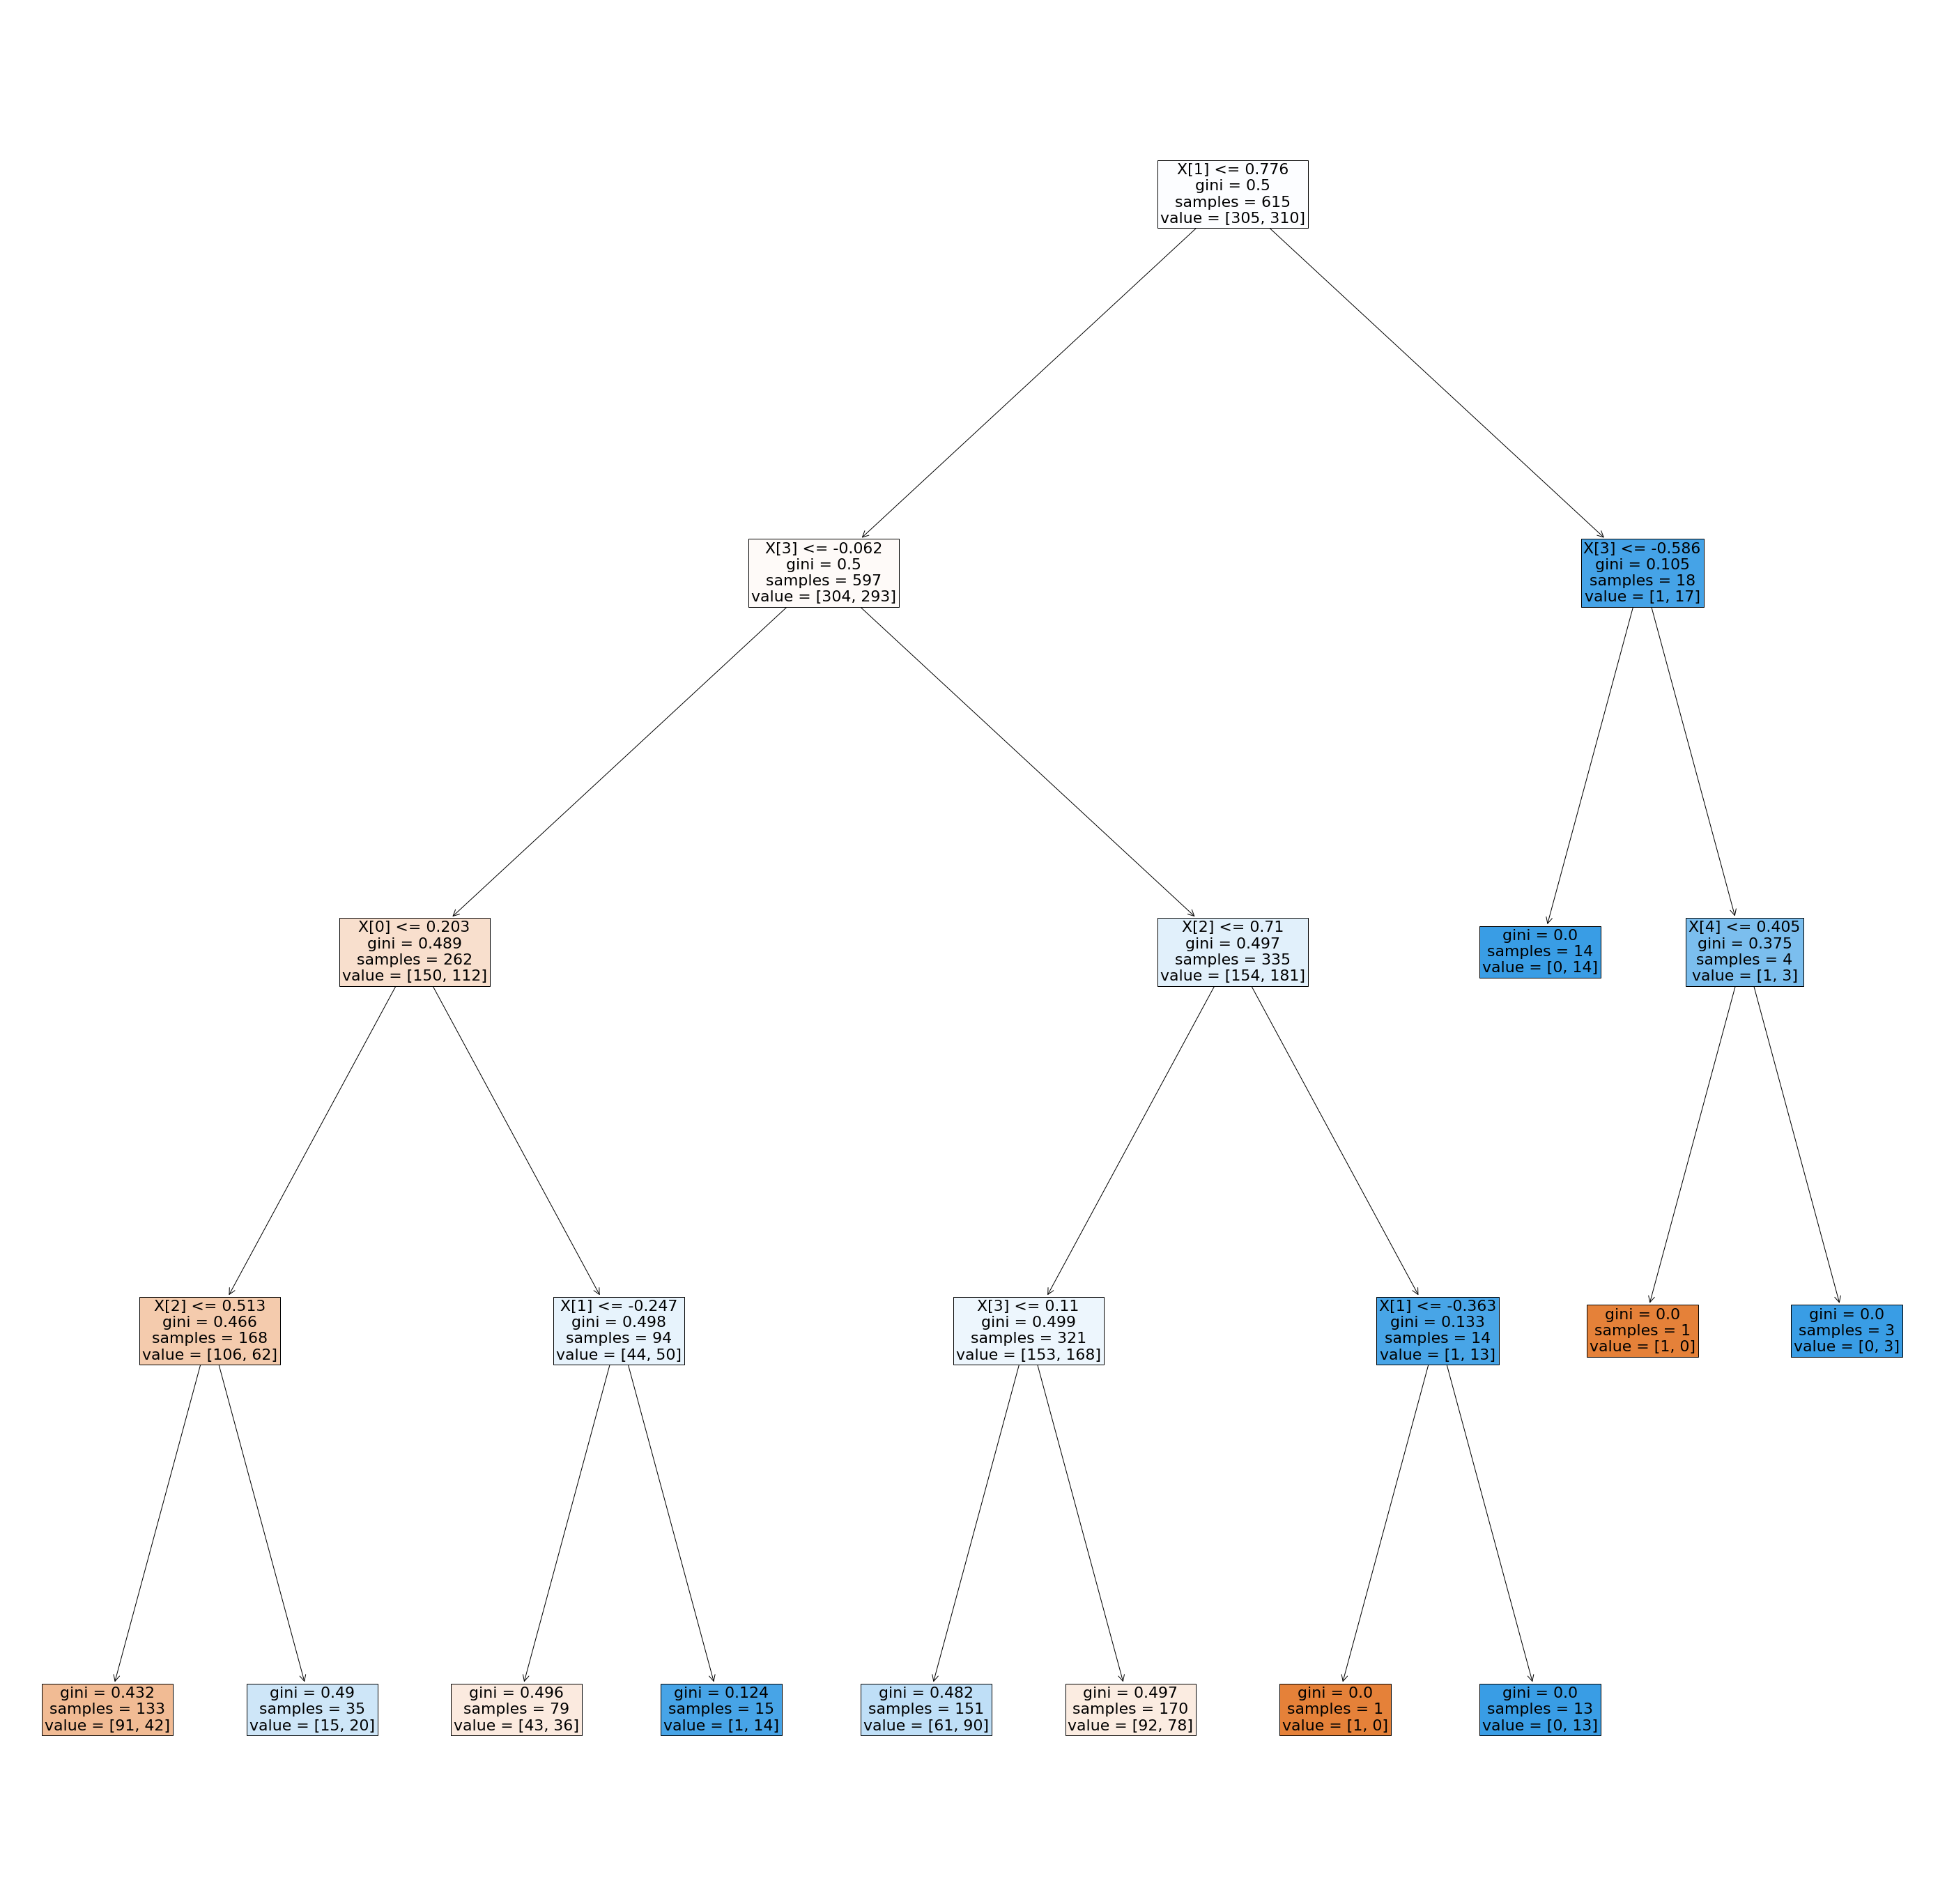

In [768]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [769]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [770]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      62.113821  52.597403
Precision     66.666667  56.338028
Recall        49.677419  48.780488
F1 Score      56.931608  52.287582


# Target_4

In [771]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [772]:
# Basic Varaibles --> all the columns are the same, except for target_4
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_4"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_4
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,1
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,0
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,1
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,1


In [773]:
pd.DataFrame(df.isna().sum()).T

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_4
0,0,0,1,0,26,18,20,15,0,0,0,0,18,0,15,0,15,0


### Cleaning NaN issue

In [774]:
#df = df.fillna(df.mean())
df = df.dropna()

# Train/test split

In [775]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [776]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [777]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [778]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_4
0    289
1    326
Name: target_4, dtype: int64


# Feature scaling

In [779]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [780]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [781]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [782]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Disparity_s_5
Removed from list of features: Wiki_Disparity_s
Removed from list of features: Google_MAvg_s_5
Removed from list of features: Google_Disparity_s_Move
Removed from list of features: Google_Move


In [783]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [784]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

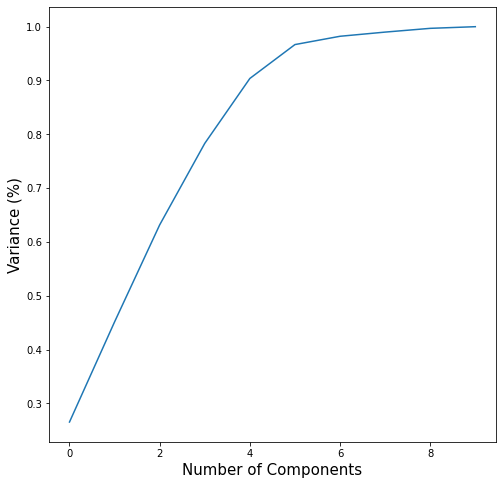

In [785]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [786]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [787]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [788]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [789]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.718310  0.485714  0.579545  105.000000
be long        0.349398  0.591837  0.439394   49.000000
accuracy       0.519481  0.519481  0.519481    0.519481
macro avg      0.533854  0.538776  0.509470  154.000000
weighted avg   0.600929  0.519481  0.534952  154.000000



### Tree diagram

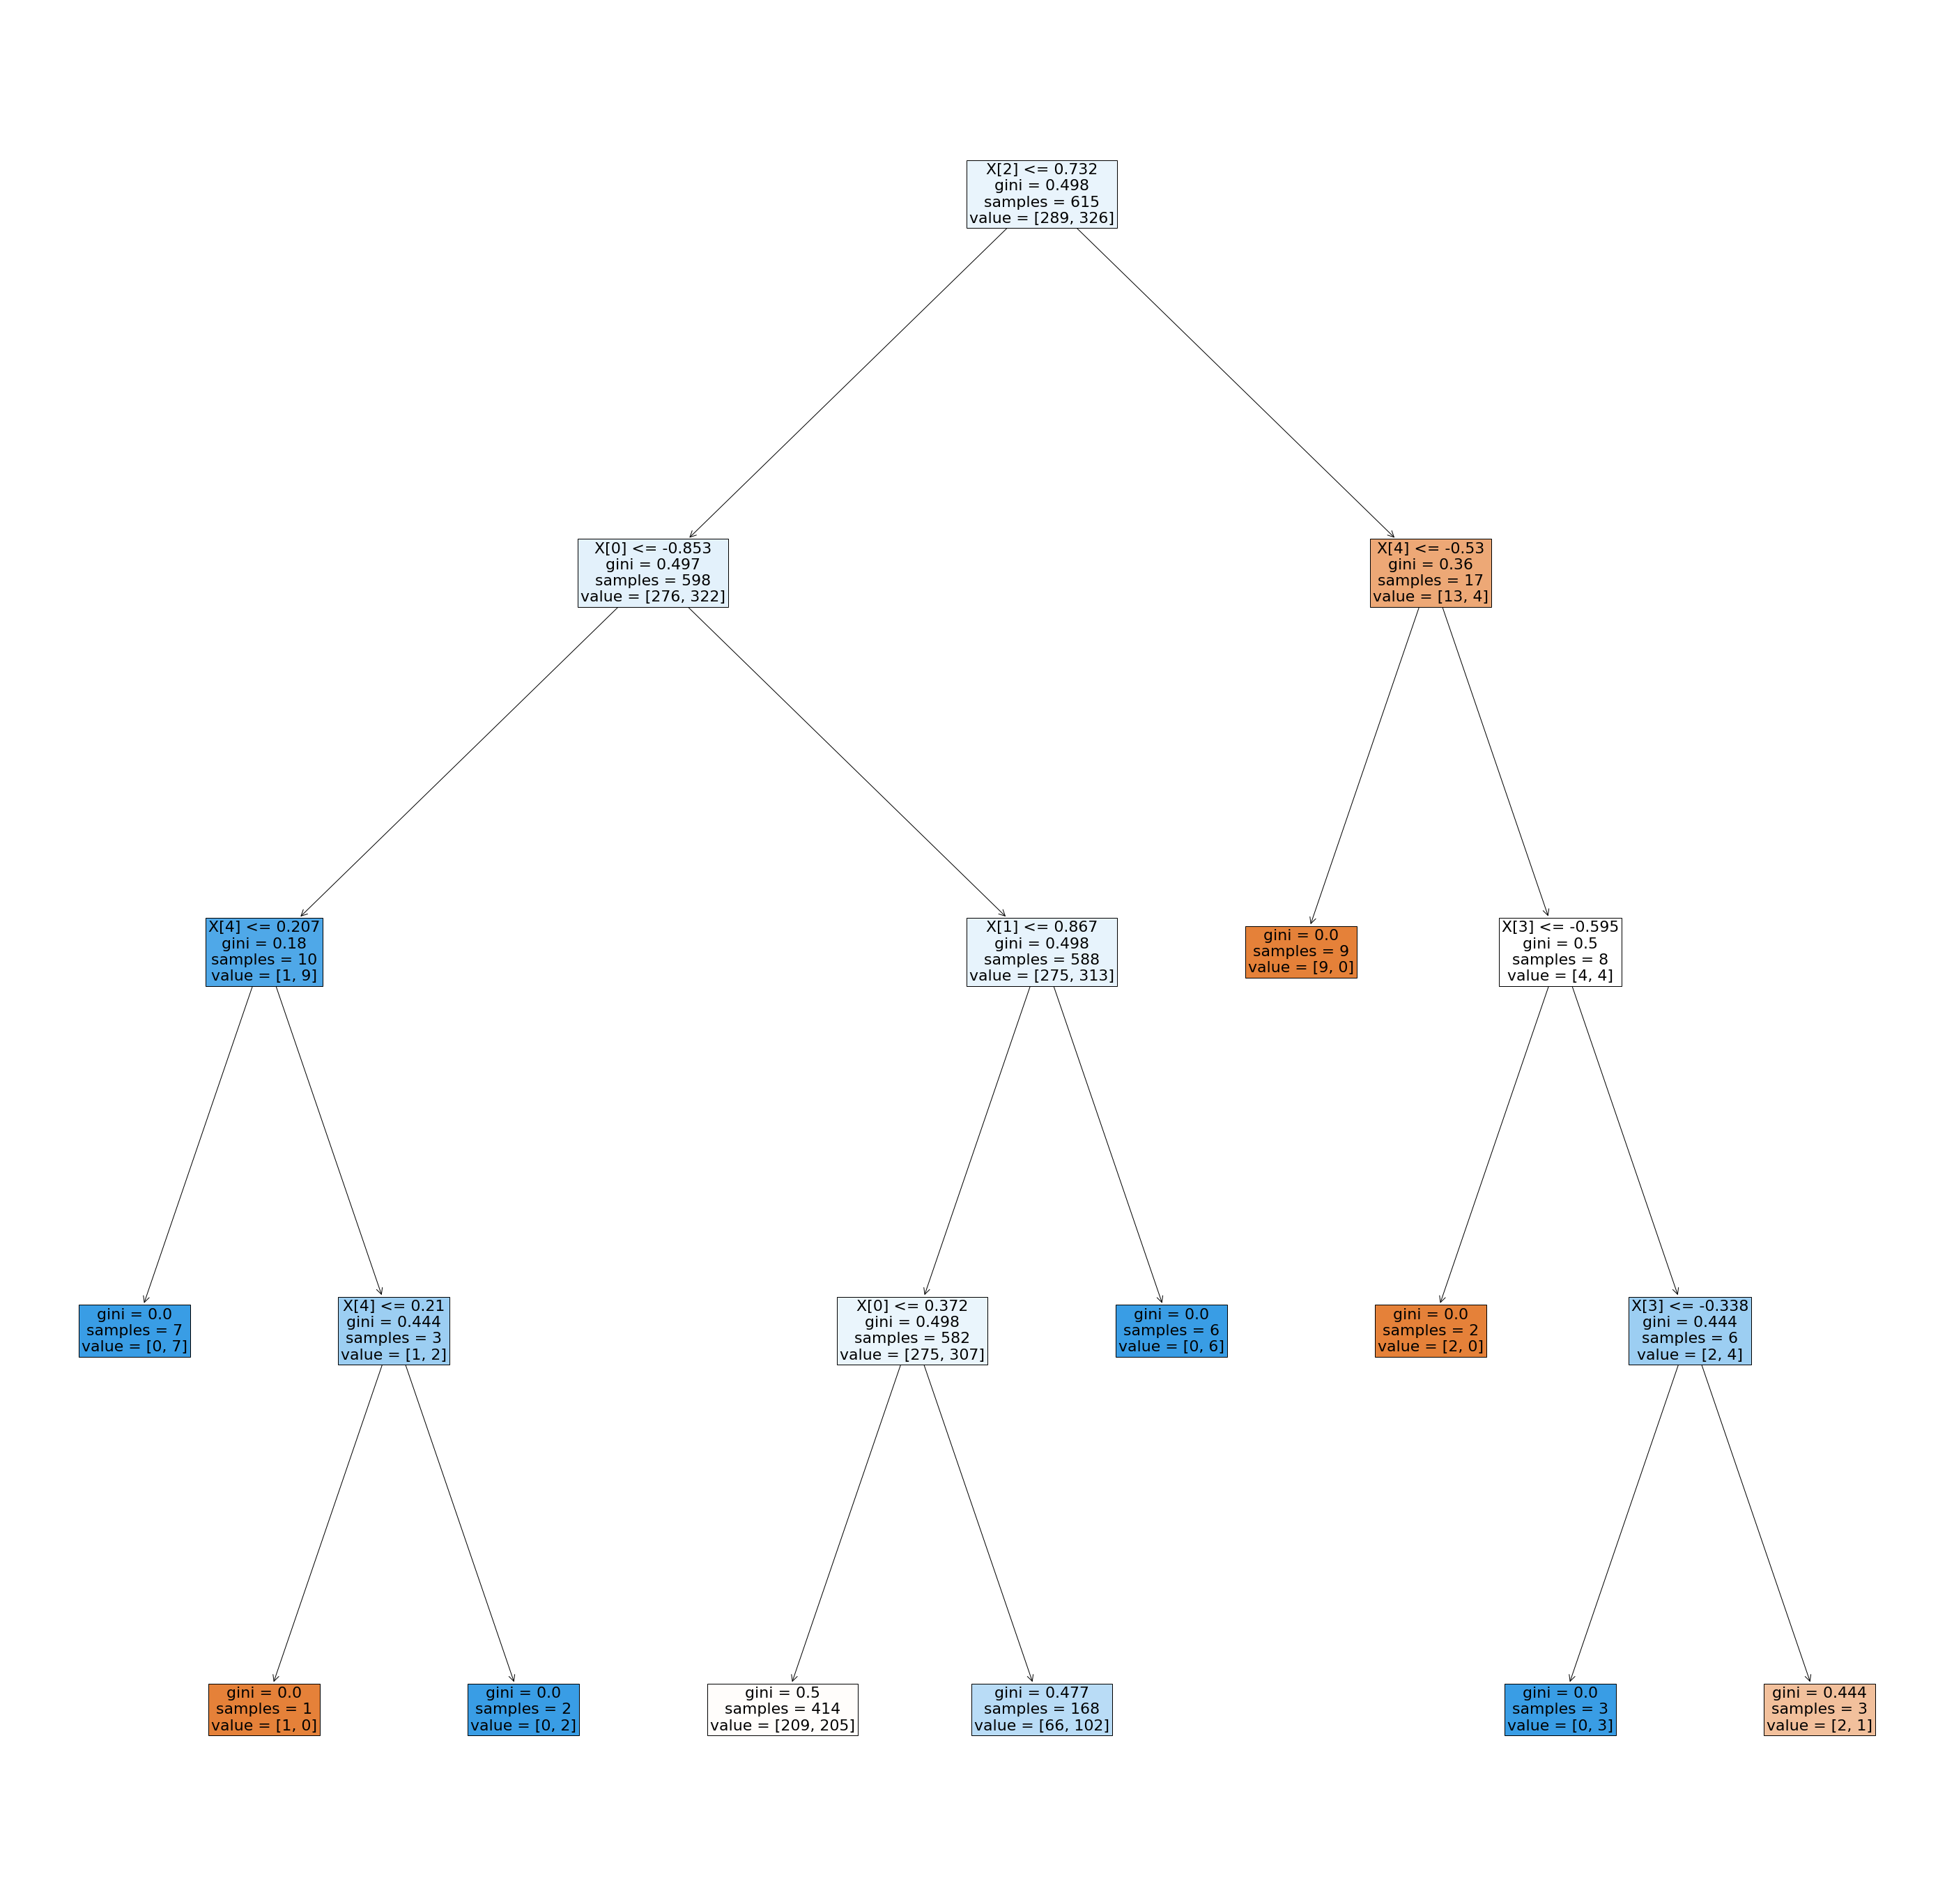

In [790]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [791]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [792]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      55.772358  51.948052
Precision     64.516129  59.183673
Recall        36.809816  34.939759
F1 Score      46.875000  43.939394


# Target_5

In [793]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [794]:
# Basic Varaibles --> all the columns are the same, except for target_5
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_5"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_5
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,1
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,0
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,1
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,0
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,0


In [795]:
pd.DataFrame(df.isna().sum()).T

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_5
0,0,0,1,0,26,18,20,15,0,0,0,0,18,0,15,0,15,0


### Cleaning NaN issue

In [796]:
#df = df.fillna(df.mean())
df = df.dropna()

# Train/test split

In [797]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [798]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [799]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [800]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_5
0    320
1    295
Name: target_5, dtype: int64


# Feature scaling

In [801]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [802]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [803]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [804]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Disparity_s_5
Removed from list of features: Wiki_Move
Removed from list of features: Google_MAvg_s_6
Removed from list of features: Google_Disparity_s_Move
Removed from list of features: Google_ROC_Move


In [805]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [806]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

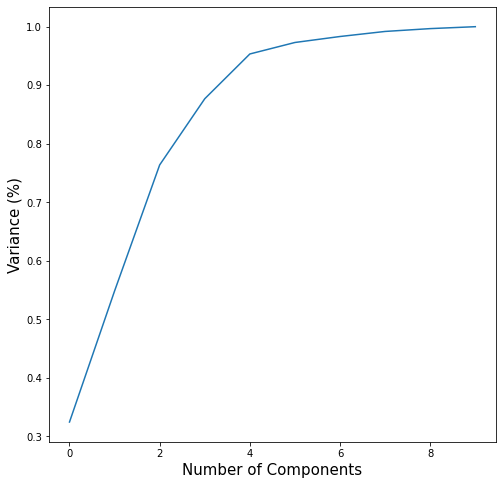

In [807]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [808]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [809]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [810]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [811]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.550000  0.543210  0.546584   81.000000
be long        0.500000  0.506849  0.503401   73.000000
accuracy       0.525974  0.525974  0.525974    0.525974
macro avg      0.525000  0.525030  0.524993  154.000000
weighted avg   0.526299  0.525974  0.526114  154.000000



### Tree diagram

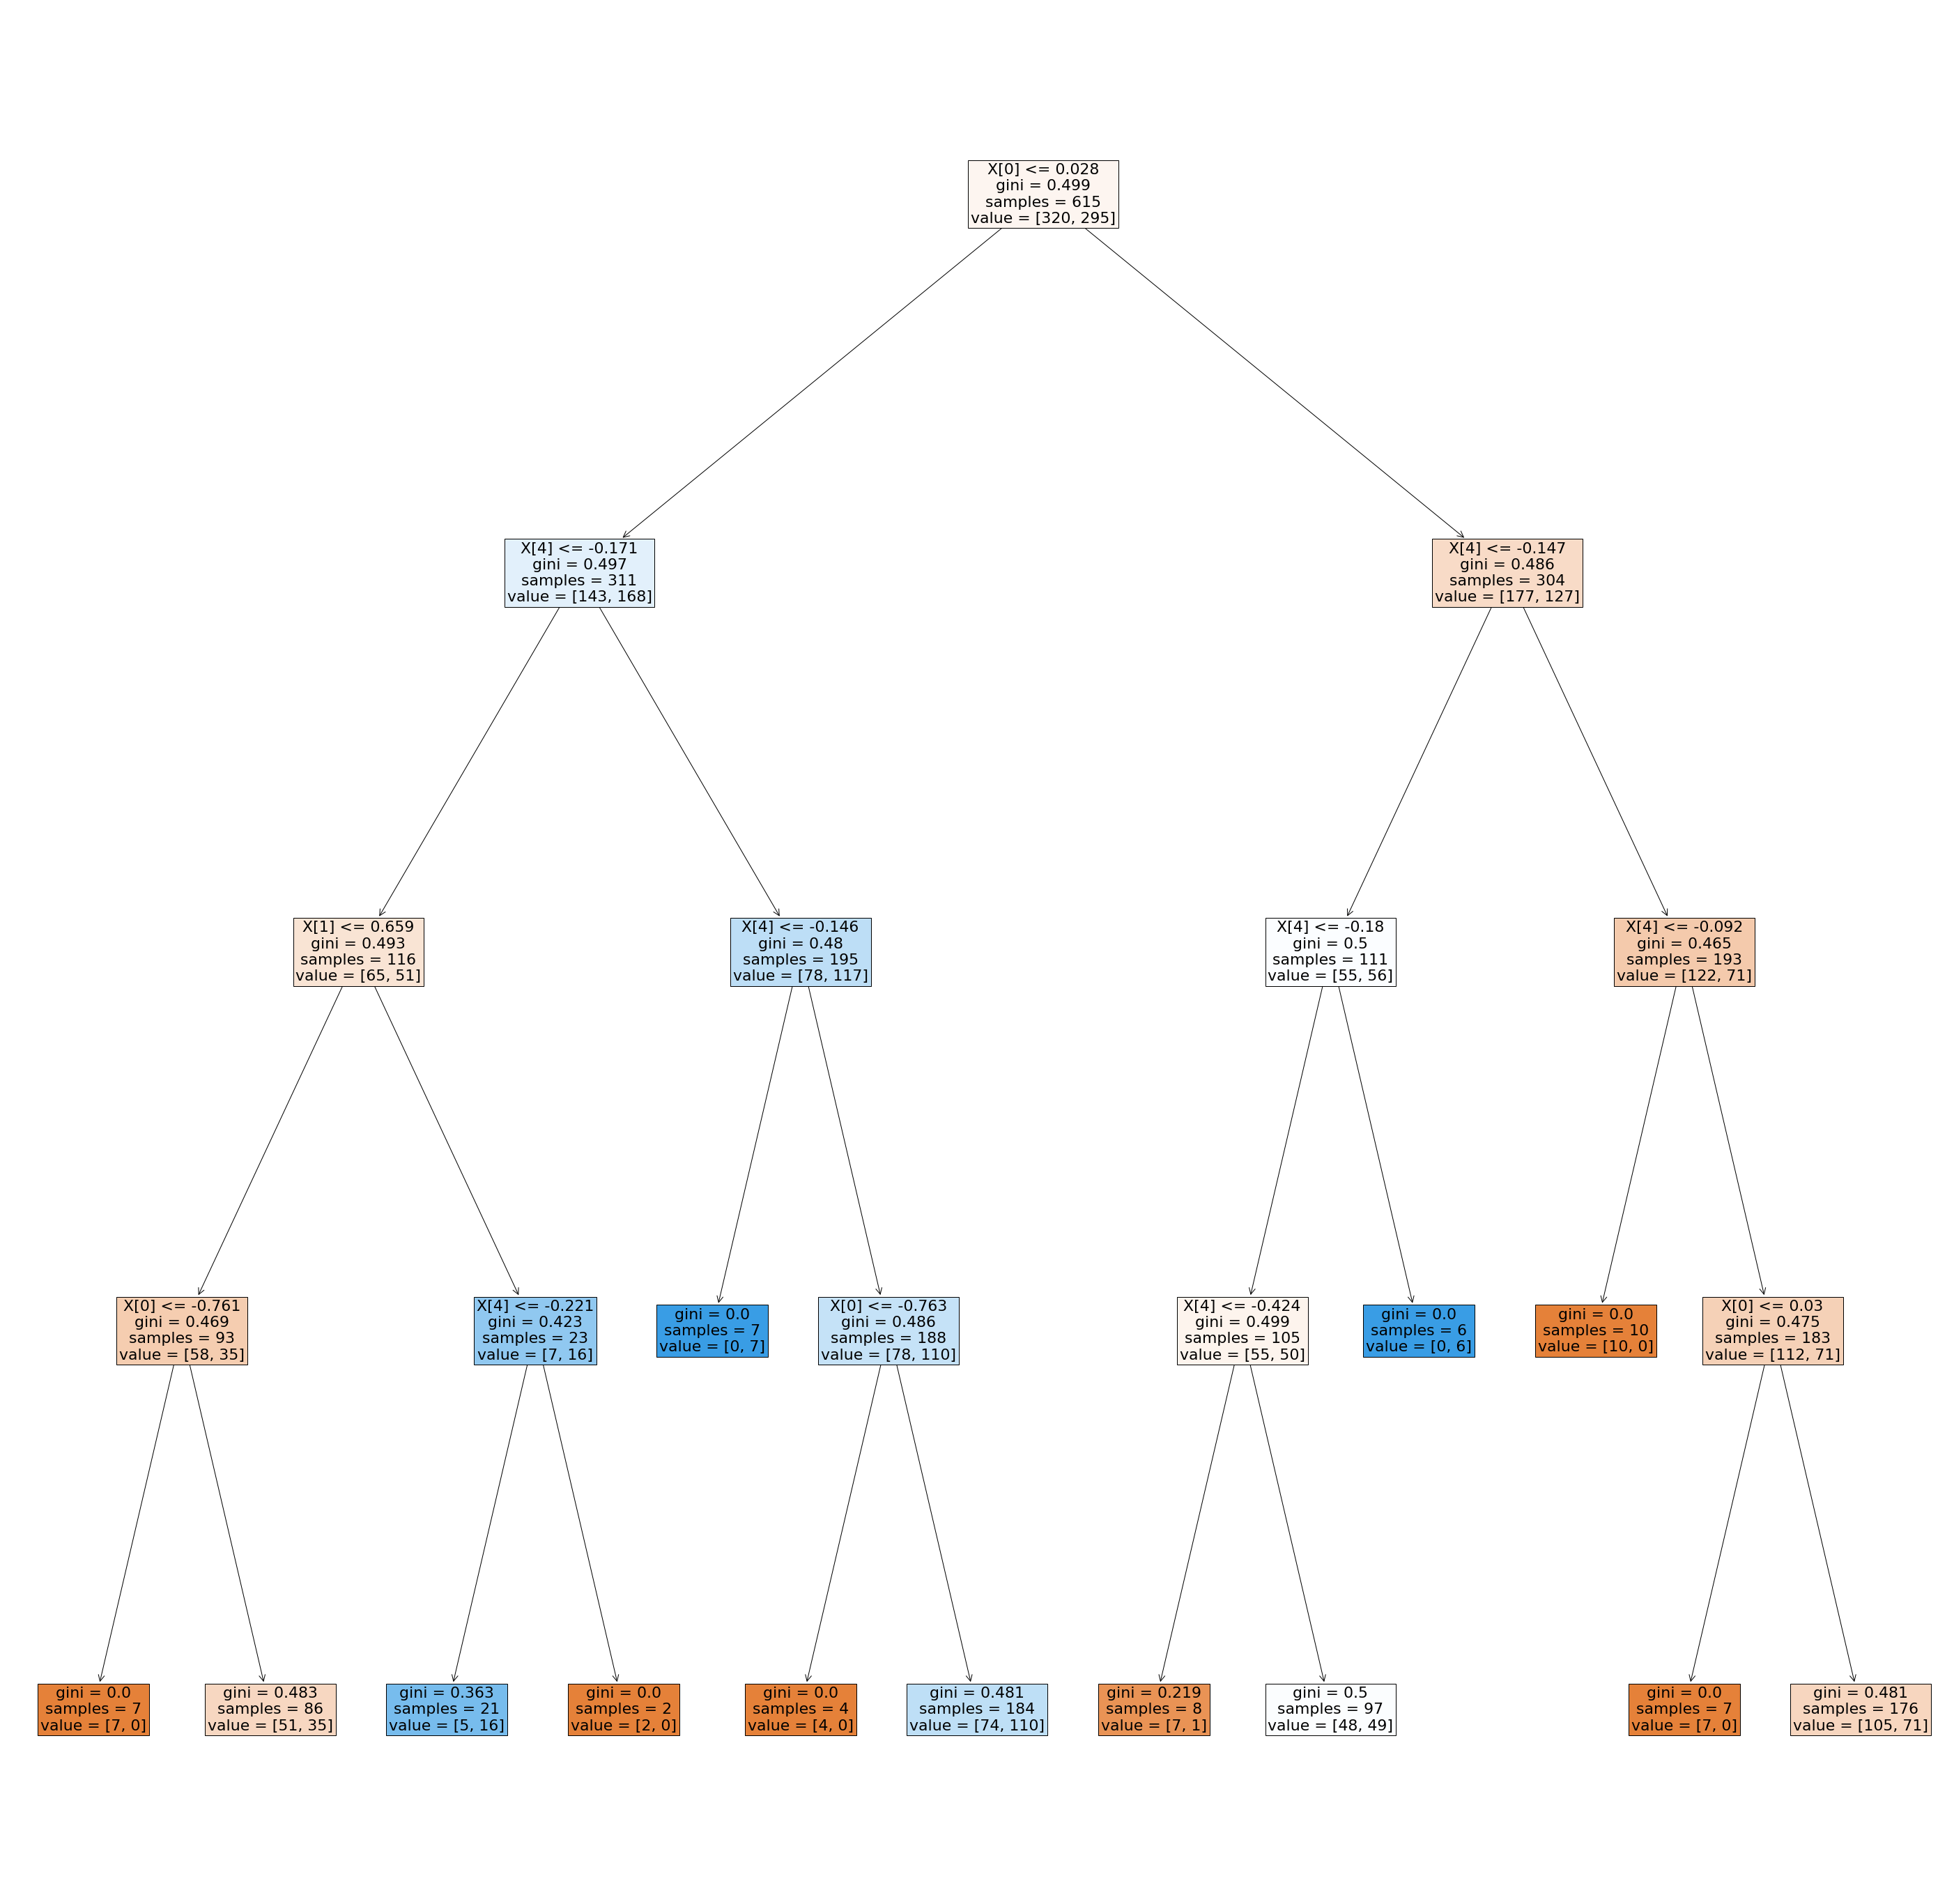

In [812]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [813]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [814]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      61.951220  52.597403
Precision     59.682540  50.684932
Recall        63.728814  50.000000
F1 Score      61.639344  50.340136
